In [46]:
# importing libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
# loading and extracting the data set
real_estate = pd.read_csv("~/Desktop/Real estate.csv")
real_estate.head() # Displays first 5 records 

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [26]:
# Describing the data set
real_estate.describe()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [44]:
# Removing python's automatic indexing and setting index as No.
#real_estate = pd.read_csv("~/Desktop/Real estate.csv", index_col = 'No')
#real_estate.head()

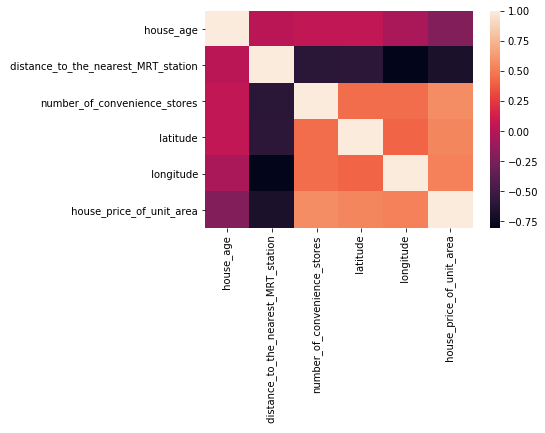

In [28]:
# Data visualisation
# Correlation map 
sns.heatmap(real_estate.corr())

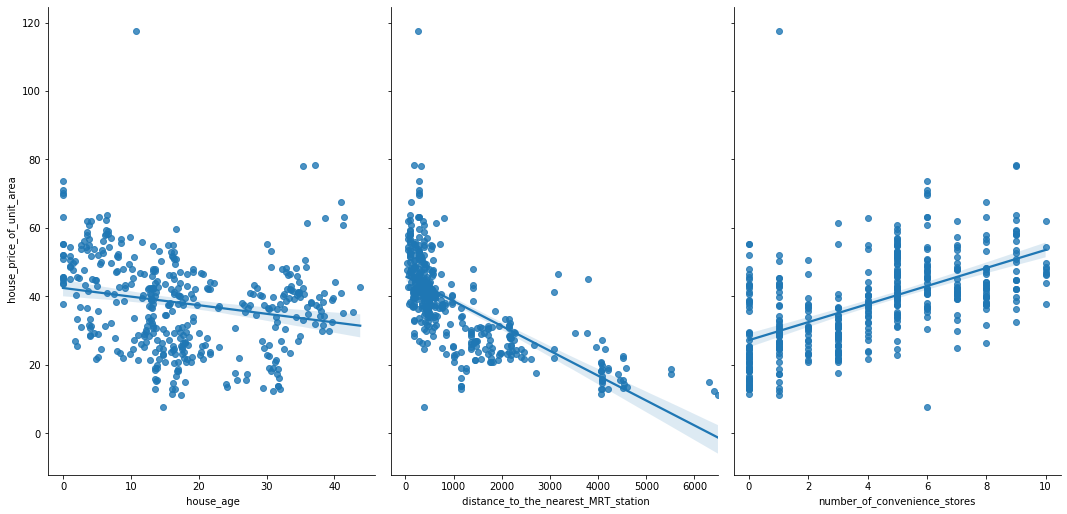

In [34]:
sns.pairplot(real_estate, x_vars = [' house_age',' distance_to_the_nearest_MRT_station','number_of_convenience_stores'], y_vars = ' house_price_of_unit_area', height = 7, aspect = 0.7, kind = 'reg')

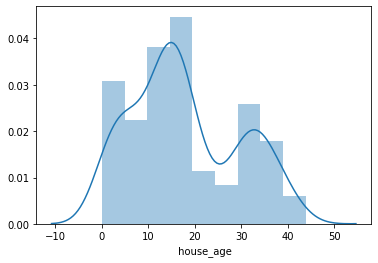

In [41]:
sns.distplot(real_estate[' house_age'])

In [40]:
# Show list of columns in the data set
list(real_estate.columns)

[' house_age',
 ' distance_to_the_nearest_MRT_station',
 'number_of_convenience_stores',
 ' latitude',
 ' longitude',
 ' house_price_of_unit_area']

In [55]:
# Setting independent variables
X = real_estate.iloc[:,:-1].values
print (X)

[[ 32.       84.87882  10.       24.98298 121.54024]
 [ 19.5     306.5947    9.       24.98034 121.53951]
 [ 13.3     561.9845    5.       24.98746 121.54391]
 ...
 [ 18.8     390.9696    7.       24.97923 121.53986]
 [  8.1     104.8101    5.       24.96674 121.54067]
 [  6.5      90.45606   9.       24.97433 121.5431 ]]


In [12]:
# Setting dependent variable
y = real_estate.iloc[:,-1].values
print (y)

[ 37.9  42.2  47.3  54.8  43.1  32.1  40.3  46.7  18.8  22.1  41.4  58.1
  39.3  23.8  34.3  50.5  70.1  37.4  42.3  47.7  29.3  51.6  24.6  47.9
  38.8  27.   56.2  33.6  47.   57.1  22.1  25.   34.2  49.3  55.1  27.3
  22.9  25.3  47.7  46.2  15.9  18.2  34.7  34.1  53.9  38.3  42.   61.5
  13.4  13.2  44.2  20.7  27.   38.9  51.7  13.7  41.9  53.5  22.6  42.4
  21.3  63.2  27.7  55.   25.3  44.3  50.7  56.8  36.2  42.   59.   40.8
  36.3  20.   54.4  29.5  36.8  25.6  29.8  26.5  40.3  36.8  48.1  17.7
  43.7  50.8  27.   18.3  48.   25.3  45.4  43.2  21.8  16.1  41.   51.8
  59.5  34.6  51.   62.2  38.2  32.9  54.4  45.7  30.5  71.   47.1  26.6
  34.1  28.4  51.6  39.4  23.1   7.6  53.3  46.4  12.2  13.   30.6  59.6
  31.3  48.   32.5  45.5  57.4  48.6  62.9  55.   60.7  41.   37.5  30.7
  37.5  39.5  42.2  20.8  46.8  47.4  43.5  42.5  51.4  28.9  37.5  40.1
  28.4  45.5  52.2  43.2  45.1  39.7  48.5  44.7  28.9  40.9  20.7  15.6
  18.3  35.6  39.4  37.4  57.8  39.6  11.6  55.5  5

In [14]:
# Splitting the dataset into the Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [15]:
# Fitting Multiple Linear Regression to the traning set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# Printing the coefficients of the model
print (model.intercept_) # for intercept
print (model.coef_) # for independent variables 

-5797.588211109447
[-2.64990176e-01 -4.14590169e-03  1.13191477e+00  2.39912594e+02
 -1.23561949e+00]


In [65]:
# Coefficients of independent variables
coeff_model = pd.DataFrame(model.coef_, columns=['Coefficient'])
coeff_model

,Coefficient
0,-0.264990
1,-0.004146
2,1.131915
3,239.912594
4,-1.235619


In [18]:
y_predict = model.predict(X_test)
print (y_predict[0:5]) # These are the predicted values 

[41.39074736 12.35535341 41.10500538 12.16895621 40.36129482]


In [85]:
y_test[0:5] # These are the actual y values

array([45.3, 14.4, 46. , 15.6, 50.2])

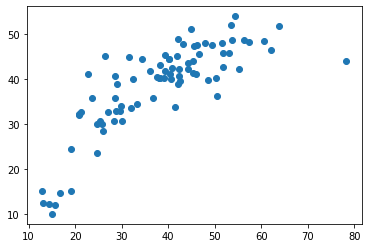

In [57]:
plt.scatter(y_test,y_predict)

In [91]:
# Calculating the r-square value
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.6420691483643988